Initializing the notebook:

In [1]:
import os
import numpy as np
from functions import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

# Get the directory where the current script is located
script_directory = os.getcwd()

# Change the current working directory to the script's directory
os.chdir(script_directory)

# Now the CWD is the same as the script's directory
print("New Current Working Directory:", os.getcwd())

New Current Working Directory: c:\Users\behra\OneDrive\Documents\PhD-behrad-legion\behrad_papers\reports


# System Model

Initially, only the equation for one state (temperature or concentration) will be considered. For simplicity, the domain will be $[0,1]$, with Danckwerts boundary conditions:

$$\left\{\begin{array}{l} \dot{x} = D\partial_{\zeta\zeta} x -v\partial_{\zeta} x +kx\\
D\partial_\zeta x(0,t)-vx(0,t)=-v[Rx(1,t-\tau)+(1-R)u(t-\tau_I)] \\
\partial_\zeta x(1,t)=0 \\
y(t)=x(1,t-\tau_O)
  \end{array}\right. $$

This model considers that the input is applied in the reactor's entrance, which is mixed with the recycle from the outlet. Input, output, and state delays are considered and represented by $\tau_I,\tau_O$, and $\tau$, respectively. 

## Eigenvalue Analysis

The eigenvalue problem, defined as $A\Phi(\zeta,\lambda)=\lambda\Phi(\zeta,\lambda)$, will result in the following system of equation for this system:

$$\left\{\begin{array}{l} \lambda\phi = D\partial_{\zeta\zeta} \phi -v\partial_{\zeta} \phi +k\phi\\
\lambda\psi=\dfrac{1}{\tau}\partial_{\zeta}\psi\\
D\partial_\zeta \phi(0)-v\phi(0)=-Rv\psi(0) \\
\partial_\zeta \phi(1)=0 \\
\psi(1)=\phi(1)\\
  \end{array}\right. $$

where $\Phi=[\phi_1,\,\phi_2]^T$, with $\phi_1$ as the state (concentration) eigenfunction and $\phi_2$ as the eigenfunction related to the delay. By defining $X=[\phi_1,\, \partial_{\zeta}\phi_1,\,\phi_2]^T$, the following system of ODEs is obtained:

$$
\left\{\begin{array}{l}\partial_{\zeta}X=\begin{bmatrix} 0 & 1 & 0\\ \dfrac{\lambda-k}{D} & \dfrac{v}{D} & 0\\0 & 0 & \tau\lambda\end{bmatrix}X=ΛX \\
DX_2(0)-vX_1(0)=-RvX_3(0) \\
X_2(1)=0 \\
X_3(1)=X_1(1)\\ \end{array}\right.
$$

## Characteristic Equation

This is a system of first order ODE's, and the solution to such systems is given by:

$$ X(\zeta, \lambda) = e^{\Lambda \zeta} X (\zeta=0, \lambda) \\ \overset{\zeta = 1}{\Rightarrow} X(1, \lambda) = e^{\Lambda} X (\zeta=0) $$

Now, let's assume:

$$ e^{\Lambda} = Q(\lambda) = \begin{bmatrix} 
        q_{1} & q_{2} & q_{3} \\ q_{4} & q_{5} & q_{6} \\ q_{7} & q_{8} & q_{9}
    \end{bmatrix} $$


Thus, we may write:

$$\left\{\begin{array}{l}
X_1(1) = q_1 X_1(0) + q_2 X_2(0) + q_3 X_3(0) \\
X_2(1) = q_4 X_1(0) + q_5 X_2(0) + q_6 X_3(0) \\
X_3(1) = q_7 X_1(0) + q_8 X_2(0) + q_9 X_3(0)
\end{array}\right.$$

Now, we may go ahead and put the above expressions into boundary conditions to get the following:

$$\left\{\begin{array}{l}
Dx_2-vx_1=-Rvx_3 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
q_7 x_1 + q_8 x_2 + q_9 x_3 = q_1 x_1 + q_2 x_2 + q_3 x_3
\end{array}\right. \Rightarrow \left\{\begin{array}{l}
-vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
(q_1 - q_7) x_1 + (q_2 - q_8) x_2 + (q_3 - q_9) x_3 = 0
\end{array}\right.$$


where $x_i$ is the same as $X_i(0)$.

For this particular case, we know that:

$$ q_{3} = q_{6} = q_{7} = q_{8} = 0 $$

This will further simplify the above system of equions into the following system:

$$\left\{\begin{array}{l}
-vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 = 0 \\
q_1 x_1 + q_2 x_2 - q_9 x_3 = 0
\end{array}\right.$$

This is a $3 \times 3$ system of algebraic equations in the form of $\bar{A} \bar{x} = 0 $, with:

$$ det(\bar{A}) = det \left( \begin{bmatrix}
-v & D & Rv \\
q_4 & q_5 & 0 \\
q_1 & q_2 & -q_9
\end{bmatrix} \right) = 0; \quad \bar{x} = \begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} $$

 For such a system to have non-trivial solution (i.e. $\bar{x} \neq 0$), the dimension of the nullspace of the coefficients matrix $\bar{A}$ needs to be non-zero. This will happen if and only if the coefficients matrix $\bar{A}$ is rank-deficient. One way to make sure matrix $ \bar{A} $ is not full-rank, is to set its determinant equal to zero. Doing so and further simplifying the result will give the characteristic equation as following:
$$
f(\lambda) = e^{(\lambda \tau+\frac{v}{2D})}
\left[
    \frac{(v^2+2D^2)}{\sqrt{v^2-4D\left(k-\lambda\right)}}\sinh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})} + v \cosh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}
\right]
- vRe^{(\frac{v}{D})}
= 0
$$

To ease numerical calculation, we use the limit of the above equation where the denominator of the first term approaches zero. The limit is obtained as follows:

$$
\lim_{p(\lambda) \to 0} f(\lambda) = ... 
= e^{(\lambda \tau+\frac{v}{2D})}
\left[
    \frac{v^2}{2D} + v + D
\right]
- vRe^{(\frac{v}{D})}

$$

where $ p(\lambda) \equiv v^2-4D\left(k-\lambda\right) $.

## Adjoint Operator

Prior to solving the obtained equation for eigenvalues, we first need to see whether or not the operator $\hat{A}$ is self-adjoint. This will be done by calculating ${\hat{A}}^{*}$ and then checking if $\hat{A} = {\hat{A}}^{*}$:

$$
\begin{align*}
    &\begin{cases}
        &\hat{A} (.) =
        &\begin{bmatrix}
            D\partial_{\zeta\zeta} (.) -v\partial_{\zeta} (.) +k(.) & 0 \\
            0 & \dfrac{1}{\tau}\partial_{\zeta} (.)
        \end{bmatrix} \\
        \, \\
        &B.C. \quad : \quad &\begin{cases}
            D\partial_\zeta \phi_1(0)-v\phi_1(0)=-Rv\phi_2(0) \\
            \partial_\zeta \phi_1(1)=0 \\
            \phi_2(1)=\phi_1(1)
        \end{cases}
    \end{cases}\\
    \, \\
    \langle \hat{A} \Phi, \Psi\rangle  = \langle \Phi, {\hat{A}}^{*} \Psi\rangle  \Rightarrow
    &\begin{cases}
        &{\hat{A}}^{*} (.) =
        &\begin{bmatrix}
            D\partial_{\zeta\zeta} (.) +v\partial_{\zeta} (.) +k(.) & 0\\
            0 & -\dfrac{1}{\tau}\partial_{\zeta} (.)
        \end{bmatrix} \\
        \, \\
        &B.C. \quad : \quad &\begin{cases}
            D\partial_\zeta \psi_{1}(1)+v\psi_{1}(1)=\dfrac{1}{\tau}\psi_{2}(1) \\
            Rv\psi_{1}(0) = \dfrac{1}{\tau}\psi_{2}(0) \\
            \partial_\zeta \psi_{1}(0)=0
        \end{cases}
    \end{cases}
    \Rightarrow \hat{A} \neq {\hat{A}}^{*}
\end{align*}
$$

Therefore, operator $\hat{A}$ is not self adjoint. However, we need to make sure that $\hat{A}$ and $\hat{A}^*$ share the same spectrum (i.e. eigenvalue distribution). Hence, we need to obtain the characteristic equation for $\hat{A}^*$, just as we did for $\hat{A}$.

### Adjoint Eigenvalue Analysis

The eigenvalue problem, defined as $\hat{A}^*\Psi_i(\zeta)=\lambda_i\Psi_i(\zeta)$, will result in the following system of equation for this system:

$$\left\{\begin{array}{l} \lambda\psi_1 = D\partial_{\zeta\zeta} \psi_1 +v\partial_{\zeta} \psi_1 +k\psi_1\\
\lambda\psi_2=-\dfrac{1}{\tau}\partial_{\zeta}\psi_2\\
D\partial_\zeta \psi_{1}(1)+v\psi_{1}(1)=\dfrac{1}{\tau}\psi_{2}(1) \\
Rv\psi_{1}(0) = \dfrac{1}{\tau}\psi_{2}(0) \\
\partial_\zeta \psi_{1}(0)=0\\
  \end{array}\right. $$

where $\Psi=[\psi_1,\,\psi_2]^T$, with $\psi_1$ and \psi_2 being adjoint eigenfunctions of the system. By defining $X=[\psi_1,\, \partial_{\zeta}\psi_1,\,\psi_2]^T$, a system of 3 first-order ODEs is obtained, that can be utilized to derive the characteristic equation for the adjoint operator.

### Adjoint Characteristic Equation

Repeating the same steps as before followed by further simplifying the result will give the adjoint characteristic equation as following:
$$
f(\lambda) = e^{(\lambda \tau+\frac{v}{2D})}
\left[
    \frac{(v^2+2D^2)}{\sqrt{v^2-4D\left(k-\lambda\right)}}\sinh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})} + v \cosh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}
\right]
- vRe^{(\frac{v}{D})}
= 0
$$

Which is exactly the same as the previous characteristic equation. We may now move forward and calculate the eigenvalues of the system for a given set of parameters.

## Numerical Solution

Initializing system parameters:

In [2]:
default_pars = obtain_default_pars('pars_list.csv')
default_pars['label'] = 'dual_2'
display(default_pars)

{'k': 1.5, 'D': 0.2, 'v': 1, 'tau': 0.8, 'R': 0.6, 'label': 'dual_2'}

### Solving Characteristic Equation for $\hat{A}$

Searching `guess` range to obtain eigenvalues distribution:

In [3]:
path = "CSV/dual_2.csv"

if not os.path.exists(path):
    guess = {
        'guess_range_real':[-75,-15,25],
        'guess_range_imag':[100,600,1000]
    }
    save_dataframe_to_csv(*find_eig(default_pars, **guess, round_sig_digits=5, tol_is_sol=1e-8, max_iter=200), 'CSV')
else:
    print("Solution has already been saved in the appropriate location.")

Solution has already been saved in the appropriate location.


Plotting the obtained eigenvalue distribution:

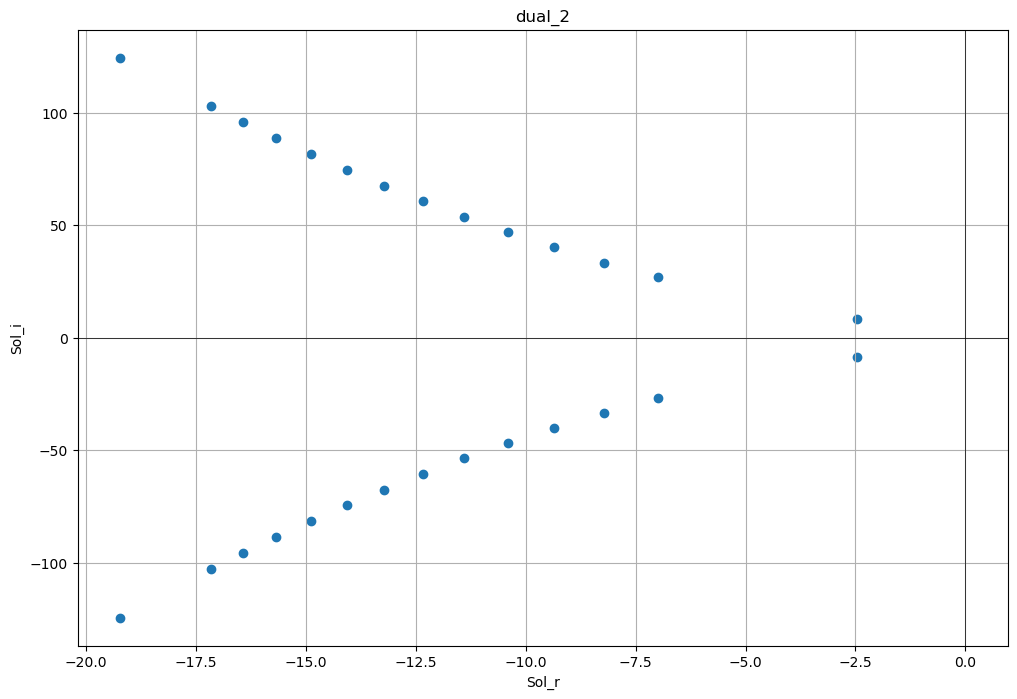

{'par': {'k': 1.5; 'D': 0.2; 'v': 1; 'tau': 0.8; 'R': 0.6; 'label': 'dual_2'}; 'guess_range': ([-75; -15; 45]; [50; 500; 400]); 'tols': (1e-09; 1e-08; 5)}


,Sol_r,Sol_i,Guess,g(x),g*(x),ier,msg,infodict,cumul_err,cmplx_cnj,cluster_label,instances
0,-2.470670,8.418532,[-2.47067044 8.41853196],3.155847e-15,1.084160e-14,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.29897224, -0.95...",1.274996e-28,No,-1,2
1,-2.470670,-8.418532,[-2.47067044 8.41853196],3.155847e-15,1.084160e-14,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.29897224, -0.95...",1.274996e-28,Yes,-1,2
2,-7.000478,-26.798626,[ -7.00047806 -26.79862647],2.401780e-15,2.842171e-13,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.98682827, -0.16...",8.078513e-26,Yes,3,8
3,-7.000478,26.798626,[ -7.00047806 -26.79862647],2.401780e-15,2.842171e-13,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.98682827, -0.16...",8.078513e-26,No,3,8
4,-8.222459,-33.375207,[ -8.22245907 -33.37520681],8.005932e-15,9.165726e-13,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.33626042, -0.94...",8.401694e-25,Yes,4,8
5,-8.222459,33.375207,[ -8.22245907 -33.37520681],8.005932e-15,9.165726e-13,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.33626042, -0.94...",8.401694e-25,No,4,8
6,-9.350879,-40.068869,[ -9.35087891 -40.06886906],9.780050e-15,1.607775e-12,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.58028978, 0.81...",2.585035e-24,Yes,1,62
7,-9.350879,40.068869,[ -9.35087891 -40.06886906],9.780050e-15,1.607775e-12,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.58028978, 0.81...",2.585035e-24,No,1,62
8,-10.403441,-46.852657,[-10.40344077 -46.85265656],5.197931e-15,9.932483e-12,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.99753443, 0.07...",9.865424e-23,Yes,0,162
9,-10.403441,46.852657,[-10.40344077 -46.85265656],5.197931e-15,9.932483e-12,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.99753443, 0.07...",9.865424e-23,No,0,162


In [4]:
df, label, metadata = plot_single_df(
        path, filter=True,
        real_lower_bound=-40, real_upper_bound=1, imag_lower_bound=-500, imag_upper_bound=500
)
n_lambdas = len(df)
display(df.head(n_lambdas))

# (To do) : 
## Sort eigval pairs based on imag
## Find more eigvals
### Think of increasing acc when far from 0
## Utilize basis of A* instead of A, check coef values
## Try Ricatti based on more eigfuns

## Obtaining Eigenfunctions

Having obtained the eigenvalues of the open-loop system, we may go ahead and find the eigenfunction corresponding to each eigenvalue. To do so, we plug in the eigenvalue into the eigenvalue problem and form a system of ODE's. Solving the resulting system will give the eigenvalue's corresponding eigenfunction. We start by 3 eigenvalues with largest real parts. These values are stored in `lambdas` as follows:

In [5]:
lambdas = []
for index, row in df.head(n_lambdas).iterrows():
    l = complex(row['Sol_r'], row['Sol_i'])
    print(f'lambda_{index+1} = {l}')
    lambdas.append(l)

lambda_1 = (-2.470670435901706+8.418531957532583j)
lambda_2 = (-2.470670435901706-8.418531957532583j)
lambda_3 = (-7.000478061316252-26.79862646994095j)
lambda_4 = (-7.000478061316252+26.79862646994095j)
lambda_5 = (-8.222459065816462-33.37520681486999j)
lambda_6 = (-8.222459065816462+33.37520681486999j)
lambda_7 = (-9.350878907016543-40.06886906343362j)
lambda_8 = (-9.350878907016543+40.06886906343362j)
lambda_9 = (-10.40344077460044-46.8526565552982j)
lambda_10 = (-10.40344077460044+46.8526565552982j)
lambda_11 = (-11.3930722650329+53.70850187842569j)
lambda_12 = (-11.3930722650329-53.70850187842569j)
lambda_13 = (-12.329494245939202-60.62362725542962j)
lambda_14 = (-12.329494245939202+60.62362725542962j)
lambda_15 = (-13.2202085771797+67.58861494515973j)
lambda_16 = (-13.2202085771797-67.58861494515973j)
lambda_17 = (-14.07113558834973-74.5962932433817j)
lambda_18 = (-14.07113558834973+74.5962932433817j)
lambda_19 = (-14.887038005146405-81.64105448539988j)
lambda_20 = (-14.887038005

The problem of finding the eigenfunctions is now reduced to solving a system of linear ODEs  for each $\lambda_{i}$, containing a first order and a second order ODE.

$$\left\{\begin{array}{l}
D\partial_{\zeta\zeta} \phi_1 &-v\partial_{\zeta} \phi_1 &+(k-\lambda) \phi_1 &= 0 &\\
\, \\
&\dfrac{1}{\tau}\partial_{\zeta}\phi_2 &- \lambda\phi_2 &= 0 &\\
\end{array}\right. $$

It can be proven that the resulting characteristic equation for the second order ODE will always have 2 distinct roots as long as $\lambda \neq -k$. Therefore, the general form of the required eigenfunction looks like the following:

$$\left\{\begin{array}{l}
\phi_1^{(i)}(\zeta) =& a e^{r_{1}\zeta} + b e^{r_{2}\zeta} &\\
\, \\
\phi_2^{(i)}(\zeta) =& c e^{\tau \lambda \zeta} &\\
\end{array}\right. $$

where $a, b,$ and $c$ are unknown coefficients; two of which can be determined by applying boundary conditions, and the third wil be set after normalizing. Also, $r_{1,2}$, the roots of the second order ODE, shall be obtained as follows:

$$
{r_{1,2}}_i = \frac{v \pm \sqrt{v^2+4D\left(\lambda_i-k\right)}}{2D} \quad \text{for } i=1,2,3,\dots
$$

Applying the following boundary conditions:

$$\left\{\begin{array}{l}
D \partial_{\zeta} \phi_1 (0) - v \phi_1 (0) &=& -R v \phi_2 (0) \\
\, \\
\partial_{\zeta} \phi_1 (1) &=& 0 \\
\, \\
\phi_1(1) &=& \phi_2(1) \\
\end{array}\right. $$

will result in the following system of linear algebraic equations:

$$\left\{\begin{array}{l}
D ( a r_1 + b r_2) - v (a + b) &=& -Rvc \\
\, \\
a r_1 e^{r_1} + b r_2 e^{r_2} &=& 0 \\
\, \\
a e^{r_1} + b e^{r_2} &=& c e^{\tau \lambda} \\
\end{array}\right.$$

The above system of algebraic equation is rank deficient, resulting in one of the coefficient to be equal to $\frac{0}{0}$. Here, we decided to keep `b` and obtain `a`, `c` as functions of `b`:

$$\begin{align*}
\begin{cases}
a = -\frac{r_2 e^{r_2}}{r_1 e^{r_1}}b \\
\, \\
c = b (1-\frac{r_2}{r_1}) e^{r_2 - \tau \lambda}\\
\end{cases}
\end{align*}
$$

The third equation will be redundant, as shown below:

$$\begin{align*}
b \times \Bigl(g(\lambda_i)\Bigr) = 0
\end{align*}
$$

where $g(\lambda_i)$ is the charecteristic equation of the operator $\hat{A}$, and is always equal to zero. Therefore, the third equation will give:

$$\begin{align*}
b \times 0 = 0 \Rightarrow b = \frac{0}{0}
\end{align*}
$$

which is expected according to the explanation above.

Thus, each set of eigenfunctions $[\phi_1^{(i)}, \phi_2^{(i)}]^T$ will be obtained after solving the above system of equations for their correspoding eigenvalue $\lambda_i$, with a normalization coefficient remaining to be calculated, i.e. `b` in this case:
$$
\begin{align*}
\Rightarrow \begin{cases}
\phi_1^{(i)}(\zeta) =& b_i \Bigl[ \left( -\frac{r_{i,2} e^{r_{i,2}}}{r_{i,1} e^{r_{i,1}}}\right) e^{r_{i,1} \zeta} + e^{r_{i,2} \zeta}\Bigr]&\\
\, \\
\phi_2^{(i)}(\zeta) =& b_i (1-\frac{r_{i,2}}{r_{i,1}}) e^{r_{i,2} - \tau \lambda} e^{ \tau \lambda \zeta } &\\
\end{cases}
\end{align*}
$$

Same approach may be followed to obtain the adjoint eigenfunctions $[\psi_1^{(i)}, \psi_2^{(i)}]^T$ for their correspoding eigenvalue $\lambda_i$, again with a normalization coefficient remaining to be calculated, i.e. `b*` in this case:
$$
\begin{align*}
\Rightarrow \begin{cases}
\psi_1^{(i)}(\zeta) =& b^*_i\left[ - \frac{r_{i,2}^*}{r_{i,1}^*}e^{r_{i,1}^* \zeta} + e^{r_{i,2}^* \zeta} \right]&\\
\, \\
\psi_2^{(i)}(\zeta) =& b^*_i \left( 1- \frac{r_{i,2}^*}{r_{i,1}^*} \right) e^{- \tau \lambda \zeta} &\\
\end{cases}
\end{align*}
$$

## Normalizing Eigenfunctions

Defining the unnormalized eigenfunction as follows:

$$
\widetilde{\Phi}_i(\zeta) \equiv \frac{\Phi_i(\zeta)}{b_i} = \begin{bmatrix}
\widetilde{\phi}_1^{(i)}(\zeta)\\ \, \\ \widetilde{\phi}_2^{(i)}(\zeta)\\
\end{bmatrix} = \begin{bmatrix}
\Bigl[ \left( -\frac{r_{i,2} e^{r_{i,2}}}{r_{i,1} e^{r_{i,1}}}\right) e^{r_{i,1} \zeta} + e^{r_{i,2} \zeta}\Bigr]\\
\, \\
(1-\frac{r_{i,2}}{r_{i,1}}) e^{r_{i,2} - \tau \lambda} e^{ \tau \lambda \zeta } \\
\end{bmatrix}
$$

This approach may be followed to obtain the normalization coefficients `b` and `b*`. First, we assume that the set of eigenfunctions $\{\Phi_i(\zeta)\}$ are normal, meaning that the norm-2 of each given eigenfunction is equal to 1. This will obtain normalization coefficients `b` as follows:

$$
\begin{align*}
&\langle \Phi_i(\zeta), \Phi_i(\zeta)\rangle  = {b_i}^2 \langle \widetilde{\Phi}_i(\zeta),\widetilde{\Phi}_i(\zeta)\rangle  = 1 \Rightarrow \\
\, \\
&{b_i}^2 \int_0^1 \widetilde{\Phi}_i(\zeta) \cdot \overline{\widetilde{\Phi}_i(\zeta)} d\zeta = 1 \Rightarrow b_i = \frac{1}{\sqrt{\int_0^1 \widetilde{\Phi}_i(\zeta) \cdot \overline{\widetilde{\Phi}_i(\zeta)} d\zeta}}
\end{align*}
$$

Keep in mind that all `b` coefficients are real numbers, therefore we simply replace $b_i \cdot \overline{b_i}$ with ${b_i}^2$ in the above formula. Having obtained `b`, we may go ahead and scale adjoint eigenfunctions according to the biorthogonal theorem, which will result in `b*`.

### Bi-orthogonal Theorem

The following property, known as **biorthogonal theorem** may further assist us to both normalize the eigenfunctions of a *non-self-adjoint Riesz spectral operator*; and determine main modes of its spectrum:

**Bi-orthogonal theorem:** For every closed, linear operator $\hat{A}$ on the Hilbert space $Z$ that has simple set of eigenvalues $ \{ \lambda_n, n \geq 1 \}$ with its corresponding eigenvectors $ \{ \Phi_n, n \geq 1 \}$ forming a Riesz basis in Z, we can show that:

1. If $ \{ \Psi_n, n \geq 1 \}$ are the eigenvectors of the adjoint of A corresponding to the eigenvalues $ \{ \lambda_n, n \geq 1 \}$, then the eigenvectors can be **suitably scaled** such that $ \langle  \Phi_n, \Psi_m \rangle  = \delta_{mn} $

2. Every function $ z \in Z $ can be represented by the following infinite sum:

$$ z = \sum_{n=1}^{\infty} \langle  z, \Psi_n \rangle  \Phi_n $$

#### Matching Eigenfunctions with their Adjoints

The first result of the bi-orthogonal theorem is that we can successfully assign one of the eigenfunctions $\Psi_{(m)}$ of the adjoint operator $A^*$ and its corresponding eigenvalue $\lambda^*_{(m)}$ to one and only one eigenfunction $\Phi_{(n)}$ of the original operator $A$ with its own eigenvalue $\lambda_{(n)}$. This is done as follows:

$$ \langle A\Phi_{(n)}, \Psi_{(m)}\rangle  = \langle \Phi_{(n)}, A^* \Psi_{(m)}\rangle  $$

$$ LHS = \langle \lambda_{(n)} \Phi_{(n)}, \Psi_{(m)}\rangle  = \lambda_{(n)} \langle \Phi_{(n)}, \Psi_{(m)}\rangle  $$

$$ RHS = \langle \Phi_{(n)}, \lambda^*_{(m)} \Psi_{(m)}\rangle  = \overline{\lambda^*_{(m)}} \langle \Phi_{(n)}, \Psi_{(m)}\rangle  $$

Where $\overline{z}$ indicates the complex conjugate of $z$. Now, for the case $n = m$, we can write:

$$ n = m \Rightarrow \langle \Phi_{(n)}, \Psi_{(m)}\rangle  = \langle \Phi_{(n)}, \Psi_{(n)}\rangle  = 1 \Rightarrow \\
\lambda_{(n)} \langle \Phi_{(n)}, \Psi_{(n)}\rangle  = \overline{\lambda^*_{(n)}} \langle \Phi_{(n)}, \Psi_{(n)}\rangle  \Rightarrow \lambda_{(n)} = \overline{\lambda^*_{(n)}}$$

This means each eigenfunction $\Phi_{(n)}$ with an eigenvalue equal to $\lambda_{(n)}$ is orthogonal to an adjoint eigenfunction $\Psi_{(n)}$ with an eigenvalue $\lambda^*_{(n)}$ that is the complex conjugate of $\lambda_{(n)}$.

### Scaling Adjoint Eigenfunctions

According to the above theorem, the given set of adjoint eigenvectors $\{ \Psi_i \}$ may be scaled given the set of eigenvectors $\{ \Phi_i \}$ for the original operator. Same as above, we may start by defining un-normalized adjoing eigenfunctions:

$$
\widetilde{\Psi}_i(\zeta) \equiv \frac{\Psi_i(\zeta)}{b^*_i} = \begin{bmatrix}
\widetilde{\psi}_1^{(i)}(\zeta)\\ \, \\ \widetilde{\psi}_2^{(i)}(\zeta)\\
\end{bmatrix} = \begin{bmatrix}
\left[ - \frac{r_{i,2}^*}{r_{i,1}^*}e^{r_{i,1}^* \zeta} + e^{r_{i,2}^* \zeta} \right]\\
\, \\
\left( 1- \frac{r_{i,2}^*}{r_{i,1}^*} \right) e^{- \tau \lambda \zeta} \\
\end{bmatrix}
$$

Then we can go ahead and use the bi-orthonormality as follows:

$$
\begin{align*}
&\langle \Phi_i(\zeta), \Psi_i(\zeta)\rangle  = \langle \Phi_i(\zeta),b^*_i\widetilde{\Psi}_i(\zeta)\rangle  = 1 \Rightarrow \\
\, \\
& \int_0^1 \Phi_i(\zeta) \cdot \overline{b^*_i \widetilde{\Psi}_i(\zeta)} d\zeta = 1 \Rightarrow b^*_i = \overline{\frac{1}{\int_0^1 \Phi_i(\zeta) \cdot \overline{\widetilde{\Psi}_i(\zeta)} d\zeta}}
\end{align*}
$$

The coefficients `b` and `b*` are obtained in the following code block:

In [8]:
from scipy.integrate import quad

normal_coefs = []
for n in range(n_lambdas):
    l = lambdas[n]
    
    i_phi = quad(eig_fun_mul_0,0,1,args=(default_pars, l),complex_func=True)[0]
    b_phi = np.sqrt(1/i_phi)
    
    i_psi = quad(eig_fun_mul_1,0,1,args=(default_pars, l, [b_phi, 1]),complex_func=True)[0]
    b_psi = (1/i_psi)
    
    b = (b_phi, b_psi.conjugate())
    normal_coefs.append(b)
    
    print(f'normal_coef_phi_{n+1} = {complex(round(normal_coefs[n][0].real,4),round(normal_coefs[n][0].imag,4))}')
    print(f'normal_coef_psi_{n+1} = {complex(round(normal_coefs[n][1].real,4),round(normal_coefs[n][1].imag,4))}')
    print()

normal_coef_phi_1 = (0.6634+0j)
normal_coef_psi_1 = (0.3463+0.0027j)

normal_coef_phi_2 = (0.6634+0j)
normal_coef_psi_2 = (0.3463-0.0027j)

normal_coef_phi_3 = (0.7252+0j)
normal_coef_psi_3 = (0.2224-0.09j)

normal_coef_phi_4 = (0.7252+0j)
normal_coef_psi_4 = (0.2224+0.09j)

normal_coef_phi_5 = (0.7185+0j)
normal_coef_psi_5 = (0.2054-0.0948j)

normal_coef_phi_6 = (0.7185+0j)
normal_coef_psi_6 = (0.2054+0.0948j)

normal_coef_phi_7 = (0.7098+0j)
normal_coef_psi_7 = (0.1925-0.0973j)

normal_coef_phi_8 = (0.7098+0j)
normal_coef_psi_8 = (0.1925+0.0973j)

normal_coef_phi_9 = (0.7005+0j)
normal_coef_psi_9 = (0.1823-0.0985j)

normal_coef_phi_10 = (0.7005+0j)
normal_coef_psi_10 = (0.1823+0.0985j)

normal_coef_phi_11 = (0.6912+0j)
normal_coef_psi_11 = (0.174+0.0991j)

normal_coef_phi_12 = (0.6912+0j)
normal_coef_psi_12 = (0.174-0.0991j)

normal_coef_phi_13 = (0.682+0j)
normal_coef_psi_13 = (0.1671-0.0992j)

normal_coef_phi_14 = (0.682+0j)
normal_coef_psi_14 = (0.1671+0.0992j)

normal_coef_phi_15

In the following code block, the norm of each $\Phi_i$ is calculated and checked whether it is equal to 1:

In [10]:
for n in range(n_lambdas):
    l = lambdas[n]
    b = normal_coefs[n]

    print(np.round(quad(eig_fun_mul_0,0,1,args=(default_pars, l, b),complex_func=True)[0],4))

(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)


In the following code block, the inner product $\langle \Phi_i, \Psi_j \rangle$ is calculated and checked whether it is equal to $\delta_{ij}$:

In [ ]:
biorth_matrix = np.zeros((n_lambdas, n_lambdas))
print(biorth_matrix.shape)
for n in range(n_lambdas):
    for m in range(n_lambdas):
        l = [lambdas[n], lambdas[m]]
        b = (normal_coefs[m][0], normal_coefs[n][1])
        y = quad(eig_fun_mul_1,0,1,args=(default_pars, l, b),complex_func=True)[0]
        if y.imag < 1e-4:
            y = y.real
        biorth_matrix[n,m] = np.round(y,5)

print(biorth_matrix[:8,:8])

### Selecting dominant modes

Now that we have found and scaled all eigenfunctions, we can try to use the second part of *bi-orthogonal theorem* to find the dominant modes of the system by trying to reconstruct any function that belongs to our function space, using a finite sum, with sufficient accuracy. An arbitrary function $z(\zeta)$ that belongs to the corresponding function space may be defined as follows:

$$
z(\zeta) = \begin{bmatrix} 
    6 \\
    10 - 4 \zeta
\end{bmatrix}
$$

Therefore, we may write:

$$
\begin{align*}
    &\begin{bmatrix} 
        6 \\
        10 - 4 \zeta
    \end{bmatrix} = z(\zeta) = \sum_{n=1}^{\infty} \langle z(\zeta), \Phi^*_n \rangle \Phi_n
    \\
    = &\sum_{n=1}^{\infty} \langle\begin{bmatrix}
    6 \\ 10 - 4 \zeta
    \end{bmatrix} , \begin{bmatrix}
    \phi^*_n(\zeta) \\ \psi^*_n(\zeta)
    \end{bmatrix} \rangle \begin{bmatrix}
    \phi_n(\zeta) \\ \psi_n(\zeta)
    \end{bmatrix}
    \\
    = &\sum_{n=1}^{\infty} 
    \Biggl(\int_0^1 
    \Bigl(6 \phi^*_n(\zeta) + (10 - 4 \zeta) \psi^*_n(\zeta)\Bigr) d\zeta \begin{bmatrix}
    \phi_n(\zeta) \\ \psi_n(\zeta)
    \end{bmatrix}
    \Biggr)
    \\
    \Rightarrow & \begin{cases}
        6 &= \sum_1^{\infty} \int_0^1 \Bigl(6 \phi^*_n(\zeta) + (10 - 4 \zeta) \psi^*_n(\zeta)\Bigr) d\zeta \phi_n(\zeta) \\
        10 - 4\zeta &= \sum_1^{\infty} \int_0^1 \Bigl(6 \phi^*_n(\zeta) + (10 - 4 \zeta) \psi^*_n(\zeta)\Bigr) d\zeta \psi_n(\zeta) \\
    \end{cases}
\end{align*}
$$

The goal in this section is to find a reasonably small $N$, such that the following approximation results in an accurate enough value for the function:
$$z(\zeta) \approx \sum_{n=1}^{N} \langle z(\zeta), \Phi^*_n \rangle \Phi_n$$

This is done as follows:

## Finite Difference

To check if the above gain stabilizes the system, the system can be modeled using FDM given full-state feedback. The code is as follows:

Zero input:

In [ ]:
from scipy.sparse import csr_matrix
from scipy.integrate import solve_ivp
import plotly.graph_objs as go

N_zeta = 100
zeta = np.linspace(0,1,N_zeta)
dz = zeta[1]

# Define the time points for the solution
t_end = 10
N_t = 100
t_eval = np.linspace(0, t_end, num=N_t)  # Time points at which to evaluate

par = default_pars.copy()
(k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
# k = -1

# Lists to hold data for middle rows
rows_data = [
    k - (2*D)/(dz**2) - (v)/(dz) - (v**2)/(2*D),
    (2*D)/(dz**2),
    R * ((v)/(dz) + (v**2)/(2*D))]
rows_row_indices = [0,0,0]
rows_col_indices = [0,1,N_zeta]

# Fill the middle rows (from index 1 to N_zeta-2)
for i in range(1, N_zeta-1):
    # Fill the element before the diagonal (3), if it exists
    rows_data.extend([
        (D)/(dz**2) + (v)/(2*dz),
        k - (2*D)/(dz**2),
        (D)/(dz**2) - (v)/(2*dz)
    ])
    rows_row_indices.extend([i, i, i])
    rows_col_indices.extend([i-1, i, i+1])

# Define the last row
rows_data.extend([
    (2*D)/(dz**2),
    k - (2*D)/(dz**2)
])
rows_row_indices.extend([N_zeta-1, N_zeta-1])
rows_col_indices.extend([N_zeta-2, N_zeta-1])

for i in range(N_zeta, 2*N_zeta-2):
    rows_data.extend([
        -1/(tau*dz),
        1/(tau*dz)
        ])
    rows_row_indices.extend([i,i])
    rows_col_indices.extend([i,i+1])

# Define the last row
rows_data.extend([
        1/(tau*dz),
        -1/(tau*dz)
        ])
rows_row_indices.extend([2*N_zeta-2, 2*N_zeta-2])
rows_col_indices.extend([N_zeta-1, 2*N_zeta-2])

# Construct the middle rows as a sparse matrix
A_ode = csr_matrix((rows_data, (rows_row_indices, rows_col_indices)), shape=(2*N_zeta-1, 2*N_zeta-1))

In [ ]:
# Define the function representing the system of ODEs
def system_zero_u(t, x, A, par):
    
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
    n = int((len(x)+1)/2)
    dz = 1/(n-1)
    
    phi = x[:n]
    psi_incomplete = x[n:]
    psi = np.append(psi_incomplete, phi[-1].copy())
        
    return A.dot(x)


# Define the initial condition
phi_0 = init_cond_func_1(zeta)
psi_0 = init_cond_func_2(zeta, par)

x0 = [*phi_0, *psi_0[:-1]]



# Solve the system using solve_ivp
solution = solve_ivp(system_zero_u, (0, t_end), x0, args=(A_ode, par), t_eval=t_eval, method='RK45')

# Access the solution
times = solution.t
x_values = solution.y


# Create phi_sol with the first 100 rows and all columns of x_values
phi_sol = x_values[:N_zeta, :]

# Create psi_sol with the last 99 rows and all columns of x_values
psi_sol = x_values[N_zeta:, :]

# Append the last row of phi_sol to the end of psi_sol
psi_sol = np.vstack((psi_sol.copy(), phi_sol[-1, :].copy()))

z_grid, t_grid = np.meshgrid(t_eval, zeta)

# Create data traces for phi_sol
phi_trace = go.Surface(x=z_grid, y=t_grid, z=phi_sol, colorscale='Viridis', name='phi')

# Create a layout for phi_sol plot
phi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='phi')
    ),
    title='Phi Plot',
    width=600,
    height=500,
)

# Create a figure for phi_sol plot
phi_fig = go.Figure(data=[phi_trace], layout=phi_layout)

# Plot phi_sol figure
phi_fig.show()


# Create data traces for psi_sol
psi_trace = go.Surface(x=z_grid, y=t_grid, z=psi_sol, colorscale='Viridis', name='psi')

# Create a layout for psi_sol plot
psi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='psi')
    ),
    title='Psi Plot',
    width=600,
    height=500,
)

# Create a figure for psi_sol plot
psi_fig = go.Figure(data=[psi_trace], layout=psi_layout)

# Plot psi_sol figure
psi_fig.show()



## Ricatti Equation

In [ ]:
n_modes = 5

error = 1
counter = 0


while error > 1e-15:
    p_0_shape = np.array([*triu_to_flat(np.zeros((n_modes,n_modes)))] * 2).shape # Proper shape for initial guess
    p_0 = (np.random.rand(*p_0_shape) - 0.5) * 0.1 # Initial guess
    p_sol_flat = fsolve(ricatti, p_0, (default_pars, lambdas[:n_modes], normal_coefs[:n_modes]), xtol = 1e-14)
    K = k_ricatti(zeta, p_sol_flat, default_pars, lambdas[:n_modes], normal_coefs[:n_modes])
    has_imag_values = np.any(np.abs(K.imag) > 1e-5)
    if not has_imag_values:
        error_array = np.array(ricatti(p_sol_flat, default_pars, lambdas[:n_modes], normal_coefs[:n_modes]))
        error = np.sqrt(sum(error_array ** 2)) / (0.5 * len(p_0))
    else:
        error = 1
    counter += 1
    if counter == 50:
        p_sol_flat = np.zeros_like(p_sol_flat)
        error = 1
        print('Does not converge')
        break
    print('counter = ', counter)
    print('error = ', error)
    print('k has imaginary values? ', has_imag_values)

if error < 1:
    K = K.real.astype(float)
    print("k = ")
    display(pd.DataFrame(K))
    plt.plot(K[0], K[1], label='k_1(zeta)')
    plt.plot(K[0], K[2], label='k_2(zeta)')
    plt.legend()
    plt.show()

In [ ]:
slicer = int(len(p_sol_flat)/2)
p_flat_real = p_sol_flat[:slicer]
p_flat_imag = p_sol_flat[slicer:]
p_flat_complex = p_flat_real + p_flat_imag * 1j

p = triu_to_hermitian(flat_to_triu(p_flat_complex))
    

In [ ]:
display(np.round(p*10,2))

In [ ]:
pp = np.zeros_like(p)

for i in range(n_modes):
    for j in range(n_modes):
        pp[i,j] = p[i,j] * eig_fun_adj_2(0, par, lambdas[i], normal_coefs[i])

display(np.round(pp*10,2))

In [ ]:
i = 1
x = np.linspace(0,1,100)
y1 = eig_fun_2(x, par, lambdas[i], normal_coefs[i])
y2 = eig_fun_2(x, par, lambdas[i+1], normal_coefs[i+1])

plt.plot(x,y1.imag, label='y1')
plt.plot(x,y2.imag, label='y2')
plt.legend()
plt.show()

In [ ]:
y = []
for i in range(29):
    y.append(np.round(quad(eig_fun_mul_3, 0, 1, (par, lambdas[i], normal_coefs[i]), complex_func=True)[0].real,3))
    
plt.plot(range(len(y[9:])), y[9:])
plt.show()

In [ ]:
y[22:]

In [ ]:
par = default_pars.copy()
(k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])

# Define the function representing the system of ODEs
def system(t, x, A, B, par):
    
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
    n = int((len(x)+1)/2)
    dz = 1/(n-1)
    
    phi = x[:n]
    psi_incomplete = x[n:]
    psi = np.append(psi_incomplete, phi[-1].copy())
    
    u = np.trapz(K[1] * phi + K[2] * psi)
    
    return A.dot(x) + B * u


# Define the initial condition
phi_0 = init_cond_func_1(zeta)
psi_0 = init_cond_func_2(zeta, par)

x0 = [*phi_0, *psi_0[:-1]]

B = np.zeros_like(x0)
B[0] = ((v)/(dz) + (v**2)/(2*D)) * (1-R)

# Solve the system using solve_ivp
solution = solve_ivp(system, (0, t_end), x0, args=(A_ode, B, par), t_eval=t_eval, method='RK45')

# Access the solution
times = solution.t
x_values = solution.y

# Create phi_sol with the first 100 rows and all columns of x_values
phi_sol = x_values[:N_zeta, :]

# Create psi_sol with the last 99 rows and all columns of x_values
psi_sol = x_values[N_zeta:, :]

# Append the last row of phi_sol to the end of psi_sol
psi_sol = np.vstack((psi_sol.copy(), phi_sol[-1, :].copy()))

z_grid, t_grid = np.meshgrid(t_eval, zeta)



# Create data traces for phi_sol
phi_trace = go.Surface(x=z_grid, y=t_grid, z=phi_sol, colorscale='Viridis', name='phi')

# Create a layout for phi_sol plot
phi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='phi')
    ),
    title='Phi Plot',
    width=600,
    height=500,
)

# Create a figure for phi_sol plot
phi_fig = go.Figure(data=[phi_trace], layout=phi_layout)

# Plot phi_sol figure
phi_fig.show()


# Create data traces for psi_sol
psi_trace = go.Surface(x=z_grid, y=t_grid, z=psi_sol, colorscale='Viridis', name='psi')

# Create a layout for psi_sol plot
psi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='psi')
    ),
    title='Psi Plot',
    width=600,
    height=500,
)

# Create a figure for psi_sol plot
psi_fig = go.Figure(data=[psi_trace], layout=psi_layout)

# Plot psi_sol figure
psi_fig.show()


In [ ]:
t_plots = np.linspace(0, t_end, 6)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each t_plot and corresponding subplot
for i, t_plot in enumerate(t_plots):
    # Find the index corresponding to the closest time point
    t_index = np.abs(t_eval - t_plot).argmin()
    
    # Plot phi and psi in the current subplot
    axes[i].plot(zeta, phi_sol[:, t_index], label='phi')
    axes[i].plot(zeta, psi_sol[:, t_index], label='psi')
    axes[i].set_title(f"time (s) = {np.round(t_plot,2)}")
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
z_plots = np.linspace(0, 1, 6)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each t_plot and corresponding subplot
for i, z_plot in enumerate(z_plots):
    # Find the index corresponding to the closest time point
    z_index = np.abs(zeta - z_plot).argmin()
    
    # Plot phi and psi in the current subplot
    axes[i].plot(t_eval, phi_sol[z_index,:], label='phi')
    axes[i].plot(t_eval, psi_sol[z_index,:], label='psi')
    axes[i].set_title(f"zeta = {np.round(z_plot,2)}")
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
u = np.zeros_like(t_eval)
for i in range(len(u)):
    u[i] = np.trapz(K[1] * phi_sol[:,i-1] + K[2] * psi_sol[:,i-1])
    
plt.plot(t_eval[1:], u[1:])
plt.show()

In [ ]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt

# Assuming A_ode is your sparse matrix

# Compute eigenvalues
eigenvalues = sla.eigs(A_ode, k=N_zeta)[0]  # You can adjust k as needed

# Separate real and imaginary parts
eigenvalues_real = np.real(eigenvalues)
eigenvalues_imag = np.imag(eigenvalues)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(eigenvalues_real, eigenvalues_imag, color='b', marker='o', label='Eigenvalues')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalue Distribution')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Define the time points for the solution
t_end = 1
N_t = 100
t_eval = np.linspace(0, t_end, num=N_t)  # Time points at which to evaluate

par = default_pars.copy()
(k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])

# Define the function representing the system of ODEs
def system(t, x, A, B, par):
    
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
    n = int((len(x)+1)/2)
    dz = 1/(n-1)
    
    phi = x[:n]
    psi_incomplete = x[n:]
    psi = np.append(psi_incomplete, phi[-1].copy())
    
    u = np.trapz(K[1] * phi + K[2] * psi)
    
    return A.dot(x) + B * u


# Define the initial condition
phi_0 = init_cond_func_1(zeta)
psi_0 = init_cond_func_2(zeta, par)

x0 = [*phi_0, *psi_0[:-1]]

B = np.zeros_like(x0)
B[0] = ((v)/(dz) + (v**2)/(2*D)) * (1-R)

# Solve the system using solve_ivp
solution = solve_ivp(system, (0, t_end), x0, args=(A_ode, B, par), t_eval=t_eval, method='RK45')

# Access the solution
times = solution.t
x_values = solution.y

# Create phi_sol with the first 100 rows and all columns of x_values
phi_sol = x_values[:N_zeta, :]

# Create psi_sol with the last 99 rows and all columns of x_values
psi_sol = x_values[N_zeta:, :]

# Append the last row of phi_sol to the end of psi_sol
psi_sol = np.vstack((psi_sol.copy(), phi_sol[-1, :].copy()))

z_grid, t_grid = np.meshgrid(t_eval, zeta)



# Create data traces for phi_sol
phi_trace = go.Surface(x=z_grid, y=t_grid, z=phi_sol, colorscale='Viridis', name='phi')

# Create a layout for phi_sol plot
phi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='phi')
    ),
    title='Phi Plot',
    width=600,
    height=500,
)

# Create a figure for phi_sol plot
phi_fig = go.Figure(data=[phi_trace], layout=phi_layout)

# Plot phi_sol figure
phi_fig.show()


# Create data traces for psi_sol
psi_trace = go.Surface(x=z_grid, y=t_grid, z=psi_sol, colorscale='Viridis', name='psi')

# Create a layout for psi_sol plot
psi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='psi')
    ),
    title='Psi Plot',
    width=600,
    height=500,
)

# Create a figure for psi_sol plot
psi_fig = go.Figure(data=[psi_trace], layout=psi_layout)

# Plot psi_sol figure
psi_fig.show()


# Continue

In [ ]:
np.round(y,2)

In [ ]:
plt.plot(x,arbit_fun_1(x, default_pars), label='z')
plt.legend()
plt.show()

In [ ]:
n_lambdas = 13

x = np.linspace(0,1,1000)

s_1 = [np.zeros_like(x)]
s_2 = [np.zeros_like(x)]

y = []

e = []

for n,l in enumerate(lambdas[:n_lambdas]):
    y.append(quad(eig_fun_mul_3,0,1,args=(default_pars, l, normal_coefs[n]),complex_func=True)[0])
    # print(np.round(y,5))

    s_1.append(y[n] * eig_fun_adj_1(x,default_pars, l, normal_coefs[n]))
    s_2.append(y[n] * eig_fun_adj_2(x,default_pars, l, normal_coefs[n]))

    err_1 = s_1[n] - arbit_fun_1(x, default_pars)
    err_2 = s_2[n] - arbit_fun_2(x, default_pars)

    err_cum = err_1**2 + err_2**2
    err = np.sqrt(sum(err_cum)) / len(x)

    if np.mod(n,2) == 1:
        e.append(err)
        print(f'e_{n} = {e[-1]}')
        plt.plot(x, s_1[n], label=n)

    # if n > 0 and n < 10:
    #     plt.plot(x, s[n], label=n)

# plt.plot(range(1, len(e)+1),e)   
plt.plot(x,arbit_fun_1(x, default_pars), label='z')
plt.legend()
plt.show()


In [ ]:
n_lambdas = 13

x = np.linspace(0,1,1000)

s_1 = [np.zeros_like(x)]
s_2 = [np.zeros_like(x)]

y = []

e = []

for n,l in enumerate(lambdas[:n_lambdas]):
    y.append(quad(eig_fun_mul_2,0,1,args=(default_pars, l, normal_coefs[n]),complex_func=True)[0])
    # print(np.round(y,5))

    s_1.append(s_1[n] + y[n] * eig_fun_1(x,default_pars, l, normal_coefs[n]))
    s_2.append(s_2[n] + y[n] * eig_fun_2(x,default_pars, l, normal_coefs[n]))

    err_1 = s_1[n] - arbit_fun_1(x, default_pars)
    err_2 = s_2[n] - arbit_fun_2(x, default_pars)

    err_cum = err_1**2 + err_2**2
    err = np.sqrt(sum(err_cum)) / len(x)

    if np.mod(n,2) == 1:
        e.append(err)
        print(f'e_{n} = {e[-1]}')
        plt.plot(x, s_1[n], label=n)

    # if n > 0 and n < 10:
    #     plt.plot(x, s[n], label=n)

# plt.plot(range(1, len(e)+1),e)   
plt.plot(x,arbit_fun_1(x, default_pars), label='z')
plt.legend()
plt.show()


In [ ]:
x = np.linspace(0,1,1000)
s = [np.zeros_like(x)]
e=[]
for n,l in enumerate(lambdas):
    y = quad(eig_fun_mul_2,0,1,args=(default_pars, l, normal_coefs[n]),complex_func=True)[0]
    s.append(s[n] + y * eig_fun_2(x,default_pars, l, normal_coefs[n]))
    err = np.sqrt(sum((s[n] - arbit_fun_2(x, default_pars))**2))/1000
    e.append(err)
    if np.mod(n,2) == 1:
        print(f'e_{n} = {e[-1]}')

    # if n > 0 and n < 10:
    #     plt.plot(x, s[n], label=n)

plt.plot(range(1, len(e)+1),e)   
# plt.plot(x,arbit_fun_2(x, default_pars), label='z')
plt.legend()
plt.show()


In [ ]:
for i in range(17):
    # print(np.round(normal_coefs[i][0],2))
    print(np.round(normal_coefs[i][1],2))
    # print()


In [ ]:
x = np.linspace(0,1,1000)
n_lambda_plot = 7

# plt.plot(x, np.real(eig_fun_1(x, default_pars, lambdas[n_lambda_plot], normal_coefs[n_lambda_plot])), label='x1, real')
plt.plot(x, np.imag(eig_fun_1(x, default_pars, lambdas[n_lambda_plot], normal_coefs[n_lambda_plot])), label='x1, imag')
# plt.plot(x, np.real(eig_fun_2(x, default_pars, lambdas[n_lambda_plot], normal_coefs[n_lambda_plot])), label='x2, real')
plt.plot(x, np.imag(eig_fun_2(x, default_pars, lambdas[n_lambda_plot], normal_coefs[n_lambda_plot])), label='x2, imag')
plt.legend()

plt.show()


In [ ]:
par = default_pars.copy()
(k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
a = [0,0,0]
a[0] = D * (eig_fun_1_prime(0, default_pars, lambdas[15]))
a[1] = -v * (eig_fun_1(0, default_pars, lambdas[15]))
a[2] = R * v * (eig_fun_2(0, default_pars, lambdas[15]))
print(a, sum(a))

In [ ]:
x = np.linspace(0,1,1000)
s = []
e=[]
for n,l in enumerate(lambdas[:15]):
    y = quad(eig_fun_mul_2,0,1,args=(default_pars, l, normal_coefs[n]),complex_func=True)[0]
    s.append(y)
    if np.mod(n,2) == 1 or n == 0:
        # print(f'e_{n} = {np.round(err*100, 2)}')
        e.append(err)
        # plt.plot(x, np.real(s[n]), label=n)

print(np.round(s, 3))
# plt.plot(e)   
# plt.plot(x,np.real(arbit_fun_2(x, default_pars)), label='z')
# plt.xlabel('zeta')
# plt.ylabel('z, z_R')
# plt.legend()
# plt.show()


In [ ]:
x = np.linspace(0,1,100000)
s = [np.zeros_like(x)]
e=[]
for n,l in enumerate(lambdas[:13]):
    y = quad(eig_fun_mul_2,0,1,args=(default_pars, l, normal_coefs[n]),complex_func=True)[0]
    s.append(s[n] + y * eig_fun_2(x,default_pars, l, normal_coefs[n]))
    err = np.sqrt(sum((s[n] - arbit_fun_2(x, default_pars))**2))/1000
    if np.mod(n,2) == 1 or n == 0:
        print(f'e_{n} = {np.round(err*100, 2)}')
        e.append(err)
        plt.plot(x, np.real(s[n]), label=n)

# plt.plot(e)   
plt.plot(x,np.real(arbit_fun_2(x, default_pars)), label='z')
plt.xlabel('zeta')
plt.ylabel('z, z_R')
plt.legend()
plt.show()
